In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
in_df = pd.read_csv('flipflop/in_dist.csv')
out_df = pd.read_csv('flipflop/out_dist.csv')

In [3]:
in_data = in_df[in_df.columns[1]]
out_data = out_df[out_df.columns[1]]

In [4]:
in_data, out_data = in_data[:1400], out_data[:1400]

in_data = np.log((1 - in_data/100))
out_data = np.log((1 - out_data/100))
# out_data = 1 - np.log(out_data)

/Users/yash/Desktop/LaCoCo/data/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
acc_df = pd.concat([in_data, out_data], axis=1)
# in-distribution FFL(0.8), o.o.d.: FFL(0.98)
acc_df.columns = ['in_dist', 'out_dist']
acc_df

,in_dist,out_dist
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1395,-inf,-inf
1396,-inf,-inf
1397,-inf,-inf
1398,-inf,-inf


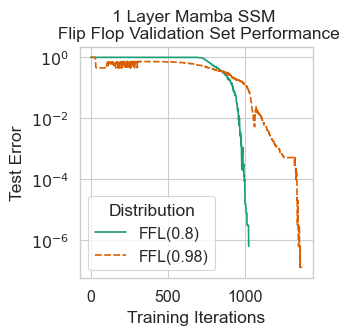

In [36]:
sns.set_theme(style="whitegrid", palette="Dark2", context="paper", font_scale=1.3)

# Create the line plot
plt.figure(figsize=(3, 3))
sns.lineplot(data=acc_df, palette="Dark2")

# sns.lineplot(x=acc_df.index, y = acc_df.in_dist.values, palette="Dark2")
# sns.lineplot(x=acc_df.index, y = acc_df.out_dist.values, palette="Dark2")

h, l = plt.gca().get_legend_handles_labels()
plt.legend(handles=h, labels=['FFL(0.8)', 'FFL(0.98)'], title='Distribution')
# Adding shades around the lines
# plt.fill_between(acc_df.index, acc_df['in_dist'] + 0.1,  acc_df['in_dist'] - 0.1, alpha=0.1)
# plt.fill_between(acc_df.index, acc_df['out_dist'] + 0.1, acc_df['out_dist'] - 0.1, alpha=0.1)
y_ticks = plt.yticks()[0]
y_ticks = [int(i) for i in y_ticks[1:-1]]
ytick_labels = [f'$10^{{{i}}}$' for i in y_ticks]

plt.yticks(y_ticks, ytick_labels)
# Customize the axes and labels
plt.title('1 Layer Mamba SSM \n Flip Flop Validation Set Performance')
plt.xlabel('Training Iterations')
plt.ylabel('Test Error')

plt.grid(True)
# plt.show()
plt.savefig(f"flipflop.pdf", bbox_inches="tight")

# Show the plot
plt.show()

In [123]:
filename = "/Users/yash/Desktop/LaCoCo/data/bdyck/data.csv"
df = pd.read_csv(filename)

In [124]:
newdf = df.drop(columns=['Notes', 'User', 'State', 'Tags', 'Created', 'Runtime', 'Sweep', 'dev_loss', 'dyck_D', 'dyck_k', 'embedding_dim', 'embedding_type', 'lm_type', 'num_heads', 'train_loss', 'test20_close_acc', 'epoch', 'save_path', 'train_acc', 'train_close_acc', 'dev_acc', 'test_acc', 'Name'], inplace=False)

1
2
1
2


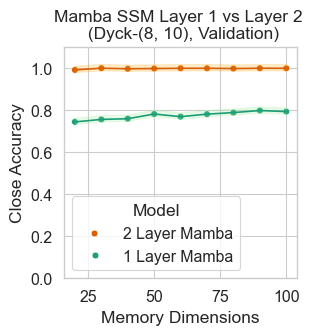

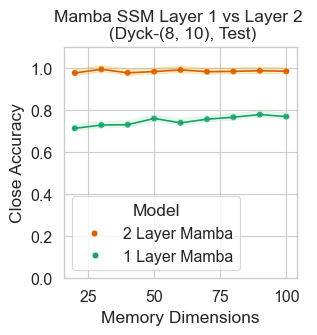

In [132]:

def set_style():
    sns.set_theme(style="whitegrid", palette="Dark2", context="paper", font_scale=1.3)

set_style()

def plot_accuracy(df, y_column, title):
    plt.figure(figsize=(3, 3))
    sns.scatterplot(data=df, x='hidden_dim', y=y_column, hue='num_layers', palette='Dark2')
    

    # Sort by 'hidden dim' and then group by 'num layers' to connect points
    sorted_df = df.sort_values(by=['hidden_dim', 'num_layers'])
    line_plots = []
    for label, group_df in sorted_df.groupby('num_layers'):
        print(label)
        line_plots.append(plt.plot(group_df['hidden_dim'], group_df[y_column], label=f'{label} Layer Mamba'))
        if label == 1:
            color = 'lightgreen'
        else:
            color = 'orange'
        plt.fill_between(group_df['hidden_dim'], group_df[y_column] + 0.02, group_df[y_column] - 0.01, alpha=0.2, color=color)

    plt.title(title)
    plt.ylim(0, 1.1)
    plt.xlabel('Memory Dimensions')
    plt.ylabel('Close Accuracy')
    plt.legend(['2 Layer Mamba', '1 Layer Mamba'], title='Model')
    plt.grid(True)
    # plt.show()
    plt.savefig(f"{y_column}_comparison.pdf", bbox_inches="tight")

# Plot for Validation Accuracy
plot_accuracy(df, 'dev_close_acc', 'Mamba SSM Layer 1 vs Layer 2 \n (Dyck-(8, 10), Validation)')

# Plot for Test Accuracy
plot_accuracy(df, 'test_close_acc', 'Mamba SSM Layer 1 vs Layer 2 \n (Dyck-(8, 10), Test)')